Asignatura: Visión por computador

Alumnos: Yeray Álvarez-Buylla Parra, María Elena Navarro Santana

Práctica 1

Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [3]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

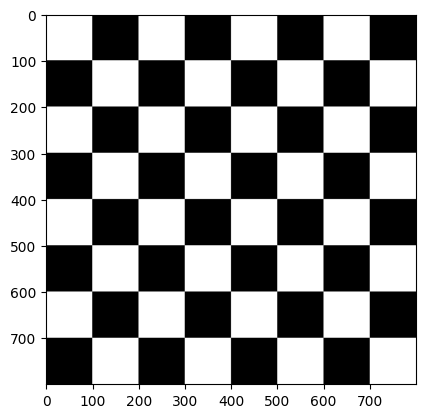

In [88]:
ajedrez_img = np.zeros((alto,ancho,1), dtype = np.uint8)
for i in range(8):
    for j in range(8):
        if (i+j)%2 == 0:
            ajedrez_img[int(i*100):int((i+1)*100),int(j*100):int((j+1)*100),0] = 255 


plt.imshow(ajedrez_img, cmap='grey') 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

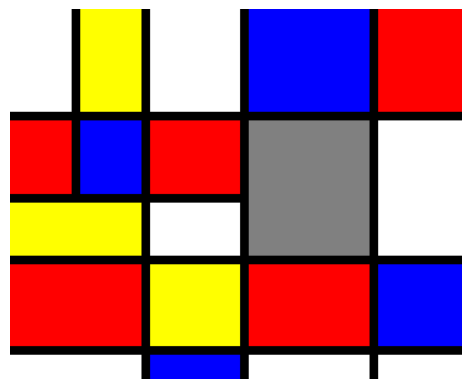

True

In [102]:
# Dimensiones de la imagen
ancho, alto = 1100, 900

# Crea una imagen en blanco
mondrian_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255

# Cuadrados de colores
for filas in range(alto):
    for columnas in range(ancho):

        # Líneas negras verticales (varias longitudes)
        if (320 <= columnas <= 340) or \
           (150 <= columnas <= 170 and filas <= 450) or \
           (560 <= columnas <= 580) or \
           (875 <= columnas <= 895):
            mondrian_img[filas, columnas] = [0, 0, 0]  # Negro

        # Líneas negras horizontales (varias longitudes)
        elif (250 <= filas <= 270) or \
             (450 <= filas <= 470 and columnas <= 570) or \
             (820 <= filas <= 840) or \
             (600 <= filas <= 620) or \
             (filas == 450 and columnas <= 550):
            mondrian_img[filas, columnas] = [0, 0, 0]  # Negro
            
        # Rectángulos rojos
        elif (filas > 600 and filas < 820 and columnas > 560 and columnas < 875) or \
           (filas > 250 and filas < 450 and columnas < 150) or \
           (filas < 250 and columnas > 875 and columnas < 1100) or \
           (filas > 250 and filas < 450 and columnas > 320 and columnas < 560) or \
           (filas > 600 and filas < 820 and columnas < 320):
            mondrian_img[filas, columnas] = [255, 0, 0]  # Rojo

        # Rectángulos amarillos
        elif (filas < 250 and columnas > 150 and columnas < 320) or \
             (filas > 450 and filas < 600 and columnas < 320) or \
             (filas > 600 and filas < 820 and columnas > 320 and columnas < 570):
            mondrian_img[filas, columnas] = [255, 255, 0]  # Amarillo

        # Rectángulos azules
        elif (filas > 820 and filas < 900 and columnas > 320 and columnas < 570) or \
             (filas > 250 and filas < 450 and columnas > 150 and columnas < 320) or \
             (filas < 250 and columnas > 560 and columnas < 875) or \
             (filas > 600 and filas < 820 and columnas > 875 and columnas < 1100):
            mondrian_img[filas, columnas] = [0, 0, 255]  # Azul
        
        # Rectángulo gris
        elif (filas > 260 and filas < 600 and columnas > 560 and columnas < 875):
            mondrian_img[filas, columnas] = [128, 128, 128]  # Gris


# Muestra la imagen
plt.imshow(mondrian_img)
plt.axis('off')  # Oculta los ejes
plt.show()

# Guarda la imagen en el disco
cv2.imwrite('imagen_optimizada_mondrian.jpg', mondrian_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

Abrir imagen almacenada en disco

(265, 474, 3)


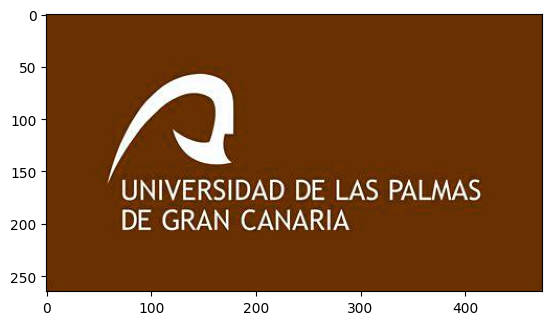

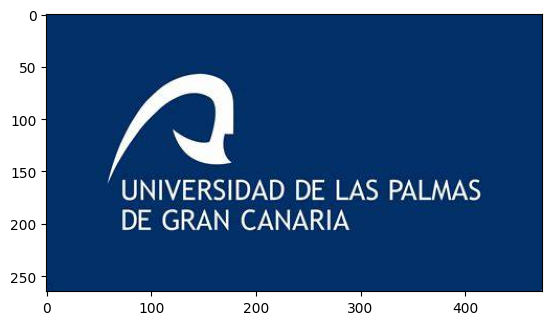

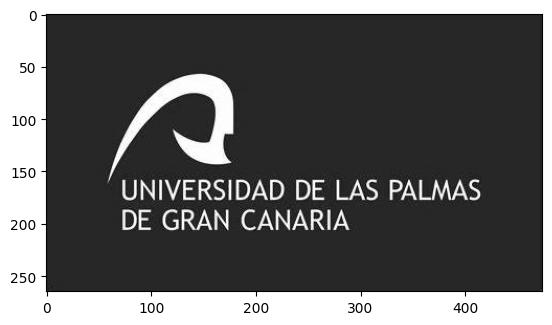

In [90]:
#Carga imagen desde disco
img = cv2.imread('logo_ulpgc.png') 
#Dimensiones de la imagen
print(img.shape)
#Muestra la imagen
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes de disco en formato BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#Fuerza lectura en grises
img = cv2.imread('logo_ulpgc.png', cv2.IMREAD_GRAYSCALE) 
plt.imshow(img, cmap='gray') 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [7]:
vid = cv2.VideoCapture(0)

while(True):      
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos los canales de color
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        
        # Dimensiones del fotograma
        h, w, c = frame.shape

        # Invierte los valores del canal rojo
        inverted_r = 255 - r

        # Concatena los tres planos del fotograma en horizontal
        collage = np.hstack((inverted_r, g, b))
    
        # Muestra el fotograma redimensionado a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5), int(h/2)), cv2.INTER_NEAREST))
    
    # Detener cuando se pulsa la tecla ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye las ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [4]:

# Inicia la captura de video desde la cámara
captura_video = cv2.VideoCapture(0)

# Bucle para procesamiento en tiempo real
while True:
    
    # Captura un frame de la cámara
    frame = captura_video.read()[1]  
    
    # Verifica si el frame es válido (la captura fue exitosa)
    if frame is None:
        break
    
    # Obtiene las dimensiones del frame
    altura, anchura, canales = frame.shape

    # Separa los canales de color RGB
    canal_rojo = frame[:, :, 0]
    canal_verde = frame[:, :, 1]
    canal_azul = frame[:, :, 2]
    
    # Inicialización de valores extremos para comparación
    valor_maximo = -1
    valor_minimo = float('inf')
    
    coord_max_claridad = (0, 0)
    coord_max_oscuridad = (0, 0)

    # Recorre la imagen en bloques de 8x8
    for fila in range(0, altura - 8, 8):
        for columna in range(0, anchura - 8, 8):

            # Calcula la suma total de valores RGB en el bloque 8x8
            suma_bloque = np.sum(canal_rojo[fila:fila+8, columna:columna+8]) + np.sum(canal_verde[fila:fila+8, columna:columna+8]) + np.sum(canal_azul[fila:fila+8, columna:columna+8])
            
            # Actualiza la coordenada del bloque más claro
            if suma_bloque > valor_maximo:
                valor_maximo = suma_bloque
                coord_max_claridad = (columna, fila)
            
            # Actualiza la coordenada del bloque más oscuro
            if suma_bloque < valor_minimo:
                valor_minimo = suma_bloque
                coord_max_oscuridad = (columna, fila)
    
    # Dibuja el círculo rojo en el bloque más claro
    centro_claro = (coord_max_claridad[0] + 4, coord_max_claridad[1] + 4)
    cv2.circle(frame, centro_claro, 8, (0, 0, 255), -1)
    
    # Dibuja el círculo verde en el bloque más oscuro
    centro_oscuro = (coord_max_oscuridad[0] + 4, coord_max_oscuridad[1] + 4)
    cv2.circle(frame, centro_oscuro, 8, (0, 255, 0), -1)

    # Muestra el frame con las marcas de las zonas más claras y oscuras
    cv2.imshow('Video en Vivo', frame)
    
    # Detiene con la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera la cámara y cierra la ventana
captura_video.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [6]:
# Captura de la cámara
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Reduce la resolución a un tercio para que sea más manejable
w = int(w / 3)
h = int(h / 3)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen 3x3 para el collage
collage = np.zeros((h*3, w*3, 3), dtype=np.uint8)

# Se asigna cada cuadrante a una parte de la imagen 
tl = collage[0:h, 0:w]
tc = collage[0:h, w:w+w]
tr = collage[0:h, w+w: w+w+w]

bl = collage[h:h+h, 0:w]
bc = collage[h:h+h, w:w+w]
br = collage[h:h+h, w+w:w+w+w]

gl = collage[h+h:h+h+h, 0:w]
gc = collage[h+h:h+h+h, w:w+w]
gr = collage[h+h:h+h+h, w+w:w+w+w]

while True:      
    # Fotograma a fotograma
    ret, frameIN = vid.read()

    # Redimensiona la imagen a un tercio del tamaño original
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if ret:
        # Se separan los canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        # Nuevas manipulaciones en cada cuadrante

        # Primer cuadrante (superior izquierdo): Imagen en escala de grises
        grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tl[:, :, 0] = grayscale
        tl[:, :, 1] = grayscale
        tl[:, :, 2] = grayscale
        
        # Segundo cuadrante (superior central): Solo el canal azul amplificado
        tc[:, :, 0] = np.clip(b * 2, 0, 255)
        tc[:, :, 1] = 0
        tc[:, :, 2] = 0

        # Tercer cuadrante (superior derecho): Efecto de posterización (reducción de colores)
        poster = (frame // 64) * 64
        tr[:, :, 0] = poster[:, :, 0]
        tr[:, :, 1] = poster[:, :, 1]
        tr[:, :, 2] = poster[:, :, 2]
        
        # Cuarto cuadrante (medio izquierdo): Efecto "edge detection"
        edges = cv2.Canny(frame, 100, 200)
        bl[:, :, 0] = edges
        bl[:, :, 1] = edges
        bl[:, :, 2] = edges
        
        # Quinto cuadrante (centro): Colores tipo "sepia"
        sepia = np.copy(frame)
        sepia[:, :, 0] = np.clip(0.272*r + 0.534*g + 0.131*b, 0, 255)
        sepia[:, :, 1] = np.clip(0.349*r + 0.686*g + 0.168*b, 0, 255)
        sepia[:, :, 2] = np.clip(0.393*r + 0.769*g + 0.189*b, 0, 255)
        bc[:, :, 0] = sepia[:, :, 0]
        bc[:, :, 1] = sepia[:, :, 1]
        bc[:, :, 2] = sepia[:, :, 2]

        # Sexto cuadrante (medio derecho): Imagen con canal rojo invertido y más contraste
        contrast = cv2.convertScaleAbs(frame, alpha=1.5, beta=0)  # Aumentar contraste
        contrast[:, :, 2] = 255 - r
        br[:, :, 0] = contrast[:, :, 0]
        br[:, :, 1] = contrast[:, :, 1]
        br[:, :, 2] = contrast[:, :, 2]
        
        # Séptimo cuadrante (inferior izquierdo): Imagen con desenfoque gaussiano
        blurred = cv2.GaussianBlur(frame, (15, 15), 0)  # Aplica desenfoque gaussiano con un kernel de 15x15
        gl[:, :, 0] = blurred[:, :, 0]
        gl[:, :, 1] = blurred[:, :, 1]
        gl[:, :, 2] = blurred[:, :, 2]
        
        # Octavo cuadrante (inferior central): Imagen en negativo
        negative = 255 - frame
        gc[:, :, 0] = negative[:, :, 0]
        gc[:, :, 1] = negative[:, :, 1]
        gc[:, :, 2] = negative[:, :, 2]
        
        # Noveno cuadrante (inferior derecho): Imagen en espejo (flip horizontal)
        flipped = cv2.flip(frame, 1)
        gr[:, :, 0] = flipped[:, :, 0]
        gr[:, :, 1] = flipped[:, :, 1]
        gr[:, :, 2] = flipped[:, :, 2]

        # Muestra la composición final
        cv2.imshow('Pop Art Cam - Versión única', collage)
    
    # Detiene con la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura y destruye las ventanas
vid.release()
cv2.destroyAllWindows()